# Group 10 Project -- UK Met Office Global Weather Data for COVID-19 Analysis

## Grasp Data from Website

Because the total size of the entire dataset is too large (352G of nc files), we grasped a subset of the hourly data, merged attributes into one csv file (122G) and stored in s3.

In [46]:
variable = ['pmsl','precip','sh','sw','t1o5m','windgust','windspeed']

In [48]:
start_date = datetime.date(2020, 4, 1)
end_date = datetime.date(2020, 6, 10)
delta = datetime.timedelta(days=1)
global_hourly_link = []

while start_date <= end_date:
    day = start_date.strftime("%Y%m%d")
    start_date += delta
    for d in variable:
        link2 = "https://metdatasa.blob.core.windows.net/covid19-response/metoffice_global_hourly/"+d+"/global_hourly_"+d+'_'+day+'.nc'
        global_hourly_link.append(link2)

In [49]:
global_hourly_link.sort()

In [50]:
len(global_hourly_link)

497

In [51]:
with open('final/global_hourly.txt', 'w') as f:
    for item in global_hourly_link:
        f.write("%s\n" % item)

### sh

In [47]:
sh = spark.read.csv("s3://123try2/sh_csv/sh_aggregated.csv",header=True,inferSchema=True)

In [48]:
sh.show(5)

+---+----+----------+---------+-----------------+------------------+--------------------+--------------------+-----------------------+----------------------------+------+-------------------+-------------------+
|_c0|bnds|  latitude|longitude|specific_humidity|latitude_longitude|     forecast_period|forecast_period_bnds|forecast_reference_time|forecast_reference_time_bnds|height|               time|          time_bnds|
+---+----+----------+---------+-----------------+------------------+--------------------+--------------------+-----------------------+----------------------------+------+-------------------+-------------------+
|  0|   0|-89.953125|0.0703125|              0.0|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|   1.5|2020-04-01 11:30:00|2020-04-01 00:00:00|
|  1|   0|-89.953125|0.2109375|              0.0|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00

In [49]:
sh.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- bnds: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- specific_humidity: double (nullable = true)
 |-- latitude_longitude: integer (nullable = true)
 |-- forecast_period: string (nullable = true)
 |-- forecast_period_bnds: double (nullable = true)
 |-- forecast_reference_time: timestamp (nullable = true)
 |-- forecast_reference_time_bnds: timestamp (nullable = true)
 |-- height: double (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- time_bnds: timestamp (nullable = true)



In [52]:
sh2 = sh.withColumnRenamed("height","height_sh")

In [53]:
sh2.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- bnds: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- specific_humidity: double (nullable = true)
 |-- latitude_longitude: integer (nullable = true)
 |-- forecast_period: string (nullable = true)
 |-- forecast_period_bnds: double (nullable = true)
 |-- forecast_reference_time: timestamp (nullable = true)
 |-- forecast_reference_time_bnds: timestamp (nullable = true)
 |-- height_sh: double (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- time_bnds: timestamp (nullable = true)



In [57]:
sh3 = sh2.drop('_c0')

In [74]:
sh3.show(5)

+----+----------+---------+-----------------+------------------+--------------------+--------------------+-----------------------+----------------------------+---------+-------------------+-------------------+
|bnds|  latitude|longitude|specific_humidity|latitude_longitude|     forecast_period|forecast_period_bnds|forecast_reference_time|forecast_reference_time_bnds|height_sh|               time|          time_bnds|
+----+----------+---------+-----------------+------------------+--------------------+--------------------+-----------------------+----------------------------+---------+-------------------+-------------------+
|   0|-89.953125|0.0703125|              0.0|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|      1.5|2020-04-01 11:30:00|2020-04-01 00:00:00|
|   0|-89.953125|0.2109375|              0.0|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00| 

### precip

In [27]:
precip = spark.read.csv("s3://123try2/merged_files/precip_aggregated.csv",header=True,inferSchema=True)

In [28]:
precip.show(5)

+---+----+----------+---------+------------------+------------------+--------------------+--------------------+-----------------------+----------------------------+-------------------+-------------------+
|_c0|bnds|  latitude|longitude|precipitation_flux|latitude_longitude|     forecast_period|forecast_period_bnds|forecast_reference_time|forecast_reference_time_bnds|               time|          time_bnds|
+---+----+----------+---------+------------------+------------------+--------------------+--------------------+-----------------------+----------------------------+-------------------+-------------------+
|  0|   0|-89.953125|0.0703125|               0.0|       -2147483647|0 days 02:00:00.0...|                -1.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|2020-04-01 11:00:00|2020-03-31 23:00:00|
|  1|   0|-89.953125|0.2109375|               0.0|       -2147483647|0 days 02:00:00.0...|                -1.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|2020-04-01 11:00

In [29]:
precip.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- bnds: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- precipitation_flux: double (nullable = true)
 |-- latitude_longitude: integer (nullable = true)
 |-- forecast_period: string (nullable = true)
 |-- forecast_period_bnds: double (nullable = true)
 |-- forecast_reference_time: timestamp (nullable = true)
 |-- forecast_reference_time_bnds: timestamp (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- time_bnds: timestamp (nullable = true)



In [59]:
precip2 = precip.drop('_c0')

In [61]:
precip2.show(5)

+----+----------+---------+------------------+------------------+--------------------+--------------------+-----------------------+----------------------------+-------------------+-------------------+
|bnds|  latitude|longitude|precipitation_flux|latitude_longitude|     forecast_period|forecast_period_bnds|forecast_reference_time|forecast_reference_time_bnds|               time|          time_bnds|
+----+----------+---------+------------------+------------------+--------------------+--------------------+-----------------------+----------------------------+-------------------+-------------------+
|   0|-89.953125|0.0703125|               0.0|       -2147483647|0 days 02:00:00.0...|                -1.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|2020-04-01 11:00:00|2020-03-31 23:00:00|
|   0|-89.953125|0.2109375|               0.0|       -2147483647|0 days 02:00:00.0...|                -1.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|2020-04-01 11:00:00|2020-03-31 23:00

### SW

In [30]:
sw = spark.read.csv("s3://123try2/merged_files/sw_aggregated.csv",header=True,inferSchema=True)

In [31]:
sw.show(5)

+---+----+----------+---------+----------+------------------+--------------------+--------------------+-----------------------+----------------------------+-------------------+-------------------+
|_c0|bnds|  latitude|longitude|m01s01i202|latitude_longitude|     forecast_period|forecast_period_bnds|forecast_reference_time|forecast_reference_time_bnds|               time|          time_bnds|
+---+----+----------+---------+----------+------------------+--------------------+--------------------+-----------------------+----------------------------+-------------------+-------------------+
|  0|   0|-89.953125|0.0703125|       0.0|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|2020-04-01 11:30:00|2020-04-01 00:00:00|
|  1|   0|-89.953125|0.2109375|       0.0|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|2020-04-01 11:30:00|2020-04-01 00:00:00|
|  2|   0|-89.9

In [32]:
sw.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- bnds: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- m01s01i202: double (nullable = true)
 |-- latitude_longitude: integer (nullable = true)
 |-- forecast_period: string (nullable = true)
 |-- forecast_period_bnds: double (nullable = true)
 |-- forecast_reference_time: timestamp (nullable = true)
 |-- forecast_reference_time_bnds: timestamp (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- time_bnds: timestamp (nullable = true)



In [62]:
sw2 = sw.drop('_c0')

In [63]:
sw2.show(5)

+----+----------+---------+----------+------------------+--------------------+--------------------+-----------------------+----------------------------+-------------------+-------------------+
|bnds|  latitude|longitude|m01s01i202|latitude_longitude|     forecast_period|forecast_period_bnds|forecast_reference_time|forecast_reference_time_bnds|               time|          time_bnds|
+----+----------+---------+----------+------------------+--------------------+--------------------+-----------------------+----------------------------+-------------------+-------------------+
|   0|-89.953125|0.0703125|       0.0|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|2020-04-01 11:30:00|2020-04-01 00:00:00|
|   0|-89.953125|0.2109375|       0.0|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|2020-04-01 11:30:00|2020-04-01 00:00:00|
|   0|-89.953125|0.3515625|       0

### t1o5m

In [33]:
t1o5m = spark.read.csv("s3://123try2/merged_files/t1o5m_aggregated.csv",header=True,inferSchema=True)

In [34]:
t1o5m.show(5)

+---+----+----------+---------+---------------+------------------+--------------------+--------------------+-----------------------+----------------------------+------+-------------------+-------------------+
|_c0|bnds|  latitude|longitude|air_temperature|latitude_longitude|     forecast_period|forecast_period_bnds|forecast_reference_time|forecast_reference_time_bnds|height|               time|          time_bnds|
+---+----+----------+---------+---------------+------------------+--------------------+--------------------+-----------------------+----------------------------+------+-------------------+-------------------+
|  0|   0|-89.953125|0.0703125|       217.6569|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|   1.5|2020-04-01 11:30:00|2020-04-01 00:00:00|
|  1|   0|-89.953125|0.2109375|      217.75781|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|   

In [35]:
t1o5m.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- bnds: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- air_temperature: double (nullable = true)
 |-- latitude_longitude: integer (nullable = true)
 |-- forecast_period: string (nullable = true)
 |-- forecast_period_bnds: double (nullable = true)
 |-- forecast_reference_time: timestamp (nullable = true)
 |-- forecast_reference_time_bnds: timestamp (nullable = true)
 |-- height: double (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- time_bnds: timestamp (nullable = true)



In [64]:
t2 = t1o5m.withColumnRenamed("height",'height_t1o5m')

In [66]:
t3 = t2.drop('_c0')

In [67]:
t3.show(5)

+----+----------+---------+---------------+------------------+--------------------+--------------------+-----------------------+----------------------------+------------+-------------------+-------------------+
|bnds|  latitude|longitude|air_temperature|latitude_longitude|     forecast_period|forecast_period_bnds|forecast_reference_time|forecast_reference_time_bnds|height_t1o5m|               time|          time_bnds|
+----+----------+---------+---------------+------------------+--------------------+--------------------+-----------------------+----------------------------+------------+-------------------+-------------------+
|   0|-89.953125|0.0703125|       217.6569|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|         1.5|2020-04-01 11:30:00|2020-04-01 00:00:00|
|   0|-89.953125|0.2109375|      217.75781|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00

### windgust

In [36]:
windgust = spark.read.csv("s3://123try2/merged_files/windgust_aggregated.csv",header=True,inferSchema=True)

In [37]:
windgust.show(5)

+---+----+----------+---------+------------------+------------------+--------------------+--------------------+-----------------------+----------------------------+------+-------------------+-------------------+
|_c0|bnds|  latitude|longitude|wind_speed_of_gust|latitude_longitude|     forecast_period|forecast_period_bnds|forecast_reference_time|forecast_reference_time_bnds|height|               time|          time_bnds|
+---+----+----------+---------+------------------+------------------+--------------------+--------------------+-----------------------+----------------------------+------+-------------------+-------------------+
|  0|   0|-89.953125|0.0703125|         6.1822915|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|  10.0|2020-04-01 11:30:00|2020-04-01 00:00:00|
|  1|   0|-89.953125|0.2109375|         6.1770835|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-

In [38]:
windgust.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- bnds: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- wind_speed_of_gust: double (nullable = true)
 |-- latitude_longitude: integer (nullable = true)
 |-- forecast_period: string (nullable = true)
 |-- forecast_period_bnds: double (nullable = true)
 |-- forecast_reference_time: timestamp (nullable = true)
 |-- forecast_reference_time_bnds: timestamp (nullable = true)
 |-- height: double (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- time_bnds: timestamp (nullable = true)



In [68]:
windgust2 = windgust.withColumnRenamed("height","height_windgust")

In [69]:
windgust3 = windgust2.drop('_c0')

In [70]:
windgust3.show(5)

+----+----------+---------+------------------+------------------+--------------------+--------------------+-----------------------+----------------------------+---------------+-------------------+-------------------+
|bnds|  latitude|longitude|wind_speed_of_gust|latitude_longitude|     forecast_period|forecast_period_bnds|forecast_reference_time|forecast_reference_time_bnds|height_windgust|               time|          time_bnds|
+----+----------+---------+------------------+------------------+--------------------+--------------------+-----------------------+----------------------------+---------------+-------------------+-------------------+
|   0|-89.953125|0.0703125|         6.1822915|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00|         2020-04-01 00:00:00|           10.0|2020-04-01 11:30:00|2020-04-01 00:00:00|
|   0|-89.953125|0.2109375|         6.1770835|       -2147483647|0 days 02:30:00.0...|                 0.0|    2020-04-01 09:00:00| 

## Join dataframes
sh3, precip2, sw2, t3, windgust3

In [84]:
df1 = sh3.join(precip2,on=['latitude','longitude','latitude_longitude','forecast_reference_time'])

In [85]:
df2 = df1.join(sw2,on=['latitude','longitude','latitude_longitude','forecast_reference_time'])

In [86]:
df3 = df2.join(t3,on=['latitude','longitude','latitude_longitude','forecast_reference_time'])

In [87]:
df4 = df3.join(windgust3,on=['latitude','longitude','latitude_longitude','forecast_reference_time'])

In [88]:
df5 = df4.join(windspeed3,on=['latitude','longitude','latitude_longitude','forecast_reference_time'])

In [90]:
df4.show(5)

+----------+---------+------------------+-----------------------+----+-----------------+--------------------+--------------------+----------------------------+---------+-------------------+-------------------+----+------------------+--------------------+--------------------+----------------------------+-------------------+-------------------+----+----------+--------------------+--------------------+----------------------------+-------------------+-------------------+----+---------------+--------------------+--------------------+----------------------------+------------+-------------------+-------------------+----+------------------+--------------------+--------------------+----------------------------+---------------+-------------------+-------------------+
|  latitude|longitude|latitude_longitude|forecast_reference_time|bnds|specific_humidity|     forecast_period|forecast_period_bnds|forecast_reference_time_bnds|height_sh|               time|          time_bnds|bnds|precipitation_flux

In [94]:
df4.printSchema()

root
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude_longitude: integer (nullable = true)
 |-- forecast_reference_time: timestamp (nullable = true)
 |-- bnds: integer (nullable = true)
 |-- specific_humidity: double (nullable = true)
 |-- forecast_period: string (nullable = true)
 |-- forecast_period_bnds: double (nullable = true)
 |-- forecast_reference_time_bnds: timestamp (nullable = true)
 |-- height_sh: double (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- time_bnds: timestamp (nullable = true)
 |-- bnds: integer (nullable = true)
 |-- precipitation_flux: double (nullable = true)
 |-- forecast_period: string (nullable = true)
 |-- forecast_period_bnds: double (nullable = true)
 |-- forecast_reference_time_bnds: timestamp (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- time_bnds: timestamp (nullable = true)
 |-- bnds: integer (nullable = true)
 |-- m01s01i202: double (nullable = true)
 |-- forecast_period: 

In [95]:
df4.cache()

DataFrame[latitude: double, longitude: double, latitude_longitude: int, forecast_reference_time: timestamp, bnds: int, specific_humidity: double, forecast_period: string, forecast_period_bnds: double, forecast_reference_time_bnds: timestamp, height_sh: double, time: timestamp, time_bnds: timestamp, bnds: int, precipitation_flux: double, forecast_period: string, forecast_period_bnds: double, forecast_reference_time_bnds: timestamp, time: timestamp, time_bnds: timestamp, bnds: int, m01s01i202: double, forecast_period: string, forecast_period_bnds: double, forecast_reference_time_bnds: timestamp, time: timestamp, time_bnds: timestamp, bnds: int, air_temperature: double, forecast_period: string, forecast_period_bnds: double, forecast_reference_time_bnds: timestamp, height_t1o5m: double, time: timestamp, time_bnds: timestamp, bnds: int, wind_speed_of_gust: double, forecast_period: string, forecast_period_bnds: double, forecast_reference_time_bnds: timestamp, height_windgust: double, time: t

In [96]:
df5 = df4.select(['latitude','longitude','latitude_longitude','forecast_reference_time','specific_humidity','height_sh','precipitation_flux','m01s01i202','air_temperature','wind_speed_of_gust','height_windgust'])

In [ ]:
df5.write.save("s3://123try2/df5_.csv",format='csv',header=True)

In [98]:
df5.printSchema()

root
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude_longitude: integer (nullable = true)
 |-- forecast_reference_time: timestamp (nullable = true)
 |-- specific_humidity: double (nullable = true)
 |-- height_sh: double (nullable = true)
 |-- precipitation_flux: double (nullable = true)
 |-- m01s01i202: double (nullable = true)
 |-- air_temperature: double (nullable = true)
 |-- wind_speed_of_gust: double (nullable = true)
 |-- height_windgust: double (nullable = true)



In [99]:
df5.count()

1101004800

In [100]:
df5.cache()

DataFrame[latitude: double, longitude: double, latitude_longitude: int, forecast_reference_time: timestamp, specific_humidity: double, height_sh: double, precipitation_flux: double, m01s01i202: double, air_temperature: double, wind_speed_of_gust: double, height_windgust: double]

In [102]:
df5.write.save("s3://123try2/df5_2.csv",format='csv',header=True)

## Required Packages Loading

In [1]:
import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext()

from pyspark.sql import SparkSession
spark = SparkSession.builder \
     .appName("Group Project") \
     .getOrCreate()

In [2]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import functions as sf
import pandas as pd
import numpy as np
#!pip install matplotlib
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns

In [3]:
from pyspark.ml.feature import VectorAssembler

In [4]:
import os,datetime,re
from datetime import datetime

## Data Cleaning

In [5]:
#df = spark.read.csv("s3://123try2/final_version.csv",header = True, inferSchema = True)
#df.write.parquet('s3://123try2/final_version_parquet')

In [6]:
df = spark.read.parquet("s3://123try2/final_version_parquet")

In [7]:
df.printSchema()

root
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude_longitude: integer (nullable = true)
 |-- forecast_reference_time: timestamp (nullable = true)
 |-- specific_humidity: double (nullable = true)
 |-- height_sh: double (nullable = true)
 |-- precipitation_flux: double (nullable = true)
 |-- m01s01i202: double (nullable = true)
 |-- air_temperature: double (nullable = true)
 |-- wind_speed_of_gust: double (nullable = true)
 |-- height_windgust: double (nullable = true)



### Dropping duplicates

In [8]:
df2 = df.dropDuplicates()

### Fill Null values with 0

In [9]:
df2 = df2.fillna({'specific_humidity':0,'precipitation_flux':0,'m01s01i202':0,'wind_speed_of_gust':0,'air_temperature':0})

In [10]:
df2.printSchema()

root
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude_longitude: integer (nullable = true)
 |-- forecast_reference_time: timestamp (nullable = true)
 |-- specific_humidity: double (nullable = false)
 |-- height_sh: double (nullable = true)
 |-- precipitation_flux: double (nullable = false)
 |-- m01s01i202: double (nullable = false)
 |-- air_temperature: double (nullable = false)
 |-- wind_speed_of_gust: double (nullable = false)
 |-- height_windgust: double (nullable = true)



In [11]:
df2.show()

+---------+-----------+------------------+-----------------------+-----------------+---------+------------------+----------+---------------+------------------+---------------+
| latitude|  longitude|latitude_longitude|forecast_reference_time|specific_humidity|height_sh|precipitation_flux|m01s01i202|air_temperature|wind_speed_of_gust|height_windgust|
+---------+-----------+------------------+-----------------------+-----------------+---------+------------------+----------+---------------+------------------+---------------+
|28.921875|132.8203125|       -2147483647|    2020-04-05 09:00:00|      0.007863362|      1.5|               0.0| 271.19922|      291.22202|          9.911458|           10.0|
|29.015625|170.2265625|       -2147483647|    2020-04-02 09:00:00|      0.010691325|      1.5|      3.1789145E-7| 220.01497|      292.25522|         10.770833|           10.0|
|29.015625|278.6484375|       -2147483647|    2020-04-06 09:00:00|      0.011779785|      1.5|       8.265178E-6|   215.

## Visualization

In [12]:
df2.createOrReplaceTempView("df22")
df2.cache()

DataFrame[latitude: double, longitude: double, latitude_longitude: int, forecast_reference_time: timestamp, specific_humidity: double, height_sh: double, precipitation_flux: double, m01s01i202: double, air_temperature: double, wind_speed_of_gust: double, height_windgust: double]

### Create the column with combination of latitude and longtitude: lat_long

In [30]:
df = df.withColumn('lat_long', sf.concat(sf.col('latitude'),sf.lit('_'), sf.col('longitude')))

In [21]:
df.createOrReplaceTempView("df")

In [22]:
df_avg = spark.sql("""
                   SELECT lat_long, avg(air_temperature) as avg_temp, avg(specific_humidity) as avg_humidity, avg(height_sh) as avg_height, avg(precipitation_flux) as avg_prec, avg(wind_speed_of_gust) as avg_windspeed, avg(height_windgust) as avg_height_windgust  
                   FROM df 
                   Group By lat_long, forecast_reference_time
                   """)

In [24]:
df_time_avg = spark.sql("""
                   SELECT forecast_reference_time, avg(air_temperature) as avg_temp, avg(specific_humidity) as avg_humidity, avg(height_sh) as avg_height, avg(precipitation_flux) as avg_prec, avg(wind_speed_of_gust) as avg_windspeed, avg(height_windgust) as avg_height_windgust  
                   FROM df 
                   Group By forecast_reference_time
                   Order By forecast_reference_time
                   """).cache()

In [26]:
df_time_avg_pandas = df_time_avg.toPandas()

/home/hadoop/miniconda/lib/python3.7/site-packages/pyarrow/util.py:39: FutureWarning: pyarrow.open_stream is deprecated as of 0.17.0, please use pyarrow.ipc.open_stream instead
  warnings.warn(msg, FutureWarning)


In [27]:
df_time_avg_pandas = df_time_avg_pandas.dropna()

In [28]:
df_time_avg_pandas

,forecast_reference_time,avg_temp,avg_humidity,avg_height,avg_prec,avg_windspeed,avg_height_windgust
1,2020-04-01 09:00:00,277.442359,0.007405,1.5,0.000029,10.080905,10.0
2,2020-04-02 09:00:00,277.114163,0.007354,1.5,0.000030,10.088855,10.0
3,2020-04-03 09:00:00,277.116855,0.007346,1.5,0.000029,10.073197,10.0
4,2020-04-04 09:00:00,277.341561,0.007364,1.5,0.000030,9.881298,10.0
5,2020-04-05 09:00:00,277.421290,0.007375,1.5,0.000028,9.664605,10.0
6,2020-04-06 09:00:00,277.487163,0.007363,1.5,0.000029,9.650821,10.0
7,2020-04-07 09:00:00,277.463202,0.007357,1.5,0.000029,9.499867,10.0


In [29]:
y_avg_temp = df_time_avg_pandas['avg_temp'].tolist()
y_avg_humidity = df_time_avg_pandas['avg_humidity'].tolist()
y_avg_height = df_time_avg_pandas['avg_height'].tolist()
y_avg_prec = df_time_avg_pandas['avg_prec'].tolist()
y_avg_windspeed = df_time_avg_pandas['avg_windspeed'].tolist()
y_avg_height_windgust = df_time_avg_pandas['avg_height_windgust'].tolist()
x_time = df_time_avg_pandas['forecast_reference_time']

### Average Temperature from April 1st to 7th

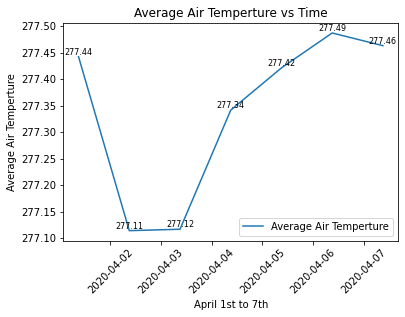

In [31]:
plt.plot(x_time, y_avg_temp)
plt.ylabel('Average Air Temperture')
plt.xlabel('April 1st to 7th')
plt.title('Average Air Temperture vs Time')
plt.legend(['Average Air Temperture'], loc= 'lower right')
for a,b in zip(x_time,y_avg_temp):
    plt.text(a,b,round(b,2), ha='center', va='bottom', fontsize = 8)
plt.tick_params(axis ='x', rotation = 45)
plt.show()

### Average Humidity from April 1st to 7th

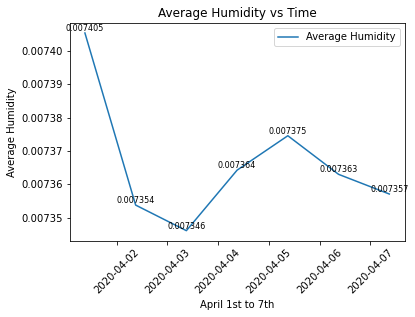

In [32]:
plt.plot(x_time, y_avg_humidity)
plt.ylabel('Average Humidity')
plt.xlabel('April 1st to 7th')
plt.title('Average Humidity vs Time')
plt.legend(['Average Humidity'], loc= 'upper right')
for a,b in zip(x_time,y_avg_humidity):
    plt.text(a,b,round(b,6), ha='center', va='bottom', fontsize = 8)
plt.tick_params(axis ='x', rotation = 45)
plt.show()

### Average Height_sh from April 1st to 7th

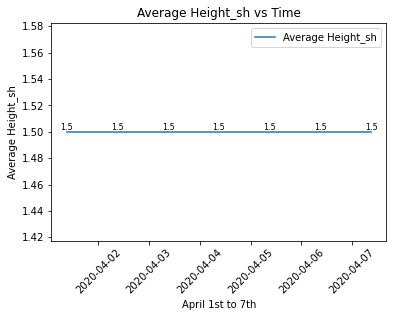

In [33]:
plt.plot(x_time, y_avg_height)
plt.ylabel('Average Height_sh')
plt.xlabel('April 1st to 7th')
plt.title('Average Height_sh vs Time')
plt.legend(['Average Height_sh'], loc= 'upper right')
for a,b in zip(x_time,y_avg_height):
    plt.text(a,b,round(b,10), ha='center', va='bottom', fontsize = 8)
plt.tick_params(axis ='x', rotation = 45)
plt.show()

### Precipitation flux from April 1st to 7th

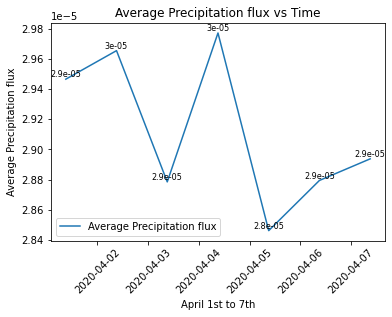

In [34]:
plt.plot(x_time, y_avg_prec)
plt.ylabel('Average Precipitation flux')
plt.xlabel('April 1st to 7th')
plt.title('Average Precipitation flux vs Time')
plt.legend(['Average Precipitation flux'], loc= 'lower left')
for a,b in zip(x_time,y_avg_prec):
    plt.text(a,b,round(b,6), ha='center', va='bottom', fontsize = 8)
plt.tick_params(axis ='x', rotation = 45)
plt.show()

### Wind speed of gust from April 1st to 7th

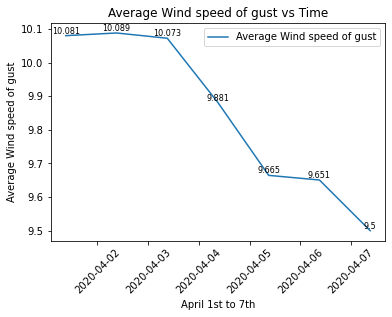

In [35]:
plt.plot(x_time, y_avg_windspeed)
plt.ylabel('Average Wind speed of gust')
plt.xlabel('April 1st to 7th')
plt.title('Average Wind speed of gust vs Time')
plt.legend(['Average Wind speed of gust'], loc= 'upper right')
for a,b in zip(x_time,y_avg_windspeed):
    plt.text(a,b,round(b,3), ha='center', va='bottom', fontsize = 8)
plt.tick_params(axis ='x', rotation = 45)
plt.show()

### Height of windgust from April 1st to 7th

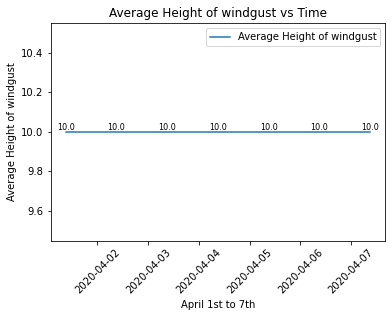

In [36]:
plt.plot(x_time, y_avg_height_windgust)
plt.ylabel('Average Height of windgust')
plt.xlabel('April 1st to 7th')
plt.title('Average Height of windgust vs Time')
plt.legend(['Average Height of windgust'], loc= 'upper right')
for a,b in zip(x_time,y_avg_height_windgust):
    plt.text(a,b,round(b,10), ha='center', va='bottom', fontsize = 8)
plt.tick_params(axis ='x', rotation = 45)
plt.show()

## SQL Data Manipulation

In [37]:
df.createOrReplaceTempView("df")

#### Find how many unique time exists in our dataset

In [38]:
df_time=spark.sql("select distinct forecast_reference_time from df")

In [39]:
df_time.show()

+-----------------------+
|forecast_reference_time|
+-----------------------+
|    2020-04-06 09:00:00|
|                   null|
|    2020-04-02 09:00:00|
|    2020-04-03 09:00:00|
|    2020-04-05 09:00:00|
|    2020-04-04 09:00:00|
|    2020-04-07 09:00:00|
|    2020-04-01 09:00:00|
+-----------------------+



#### Extract the Y-M-D  from forecast_reference_time as a new column

In [40]:
df_ymd=spark.sql("select regexp_extract(forecast_reference_time,'^[0-9]+\-[0-9]+\-[0-9]+',0) as ymd,* from df")

In [41]:
df_ymd.show()

+----------+---------+-----------+------------------+-----------------------+-----------------+---------+------------------+----------+---------------+------------------+---------------+--------------------+
|       ymd| latitude|  longitude|latitude_longitude|forecast_reference_time|specific_humidity|height_sh|precipitation_flux|m01s01i202|air_temperature|wind_speed_of_gust|height_windgust|            lat_long|
+----------+---------+-----------+------------------+-----------------------+-----------------+---------+------------------+----------+---------------+------------------+---------------+--------------------+
|2020-04-01|28.359375|351.0703125|       -2147483647|    2020-04-01 09:00:00|      0.005533854|      1.5|               0.0| 238.34895|      292.76758|          9.208333|           10.0|28.359375_351.070...|
|2020-04-01|28.359375|351.0703125|       -2147483647|    2020-04-01 09:00:00|      0.005533854|      1.5|               0.0| 238.34895|      292.76758|          9.20833

In [42]:
df_ymd.createOrReplaceTempView("df_ymd")

#### calculate  average precipitation_flux,air_temperature,specific_humidity based on time

In [43]:
df_avg_time = spark.sql("SELECT ymd ,avg(specific_humidity) as time_avg_humidity, avg(precipitation_flux) as time_avg_prec, avg(air_temperature) as time_avg_temp FROM df_ymd Group By ymd order by ymd")

In [68]:
df_avg_time = df_avg_time.dropna()
df_avg_time.show(10)

+----------+--------------------+--------------------+------------------+
|       ymd|   time_avg_humidity|       time_avg_prec|     time_avg_temp|
+----------+--------------------+--------------------+------------------+
|2020-04-01|0.007405344704752854|2.946720426865492...| 277.4423592083297|
|2020-04-02|0.007353759521743...|2.965683402688113E-5| 277.1141633362552|
|2020-04-03|0.007346095837840987|2.878448008156477...| 277.1168548796629|
|2020-04-04| 0.00736423133384262|2.977415884402474E-5| 277.3415609078695|
|2020-04-05|0.007374548851880099|2.846031479511246E-5|277.42129035234336|
|2020-04-06|0.007362980635707788|2.879408399056845...| 277.4871626003258|
|2020-04-07|0.007357078912436868|2.893753292239307E-5| 277.4632015057895|
+----------+--------------------+--------------------+------------------+



#### calculate  max  air_temperature,height_sh,wind_speed_of_gust based on time

In [45]:
df_max_time = spark.sql("SELECT ymd ,max(air_temperature) as time_max_humidity, max(wind_speed_of_gust) as time_max_windspeed, max(height_sh) as time_max_sh_height FROM df_ymd Group By ymd order by ymd")

In [69]:
df_max_time = df_max_time.dropna()
df_max_time.show(10)

+----------+-----------------+------------------+------------------+
|       ymd|time_max_humidity|time_max_windspeed|time_max_sh_height|
+----------+-----------------+------------------+------------------+
|2020-04-01|         311.6061|         43.635418|               1.5|
|2020-04-02|         310.9707|         41.151043|               1.5|
|2020-04-03|         311.5189|         47.661457|               1.5|
|2020-04-04|         311.5586|         44.140625|               1.5|
|2020-04-05|         310.9974|         41.973957|               1.5|
|2020-04-06|        310.87564|         50.229168|               1.5|
|2020-04-07|        310.46225|         41.833332|               1.5|
+----------+-----------------+------------------+------------------+



#### calculate  min  air_temperature,height_sh,wind_speed_of_gust based on time

In [47]:
df_min_time = spark.sql("SELECT ymd ,min(air_temperature) as time_min_humidity, min(wind_speed_of_gust) as time_min_windspeed, min(height_sh) as time_min_sh_height FROM df_ymd Group By ymd order by ymd")

In [70]:
df_min_time = df_min_time.dropna()
df_min_time.show(10)

+----------+-----------------+------------------+------------------+
|       ymd|time_min_humidity|time_min_windspeed|time_min_sh_height|
+----------+-----------------+------------------+------------------+
|2020-04-01|         206.2793|        0.27604166|               1.5|
|2020-04-02|         200.5638|        0.22395833|               1.5|
|2020-04-03|         198.2819|        0.27604166|               1.5|
|2020-04-04|        196.59114|              0.25|               1.5|
|2020-04-05|        195.02734|        0.22916667|               1.5|
|2020-04-06|        192.69922|        0.26041666|               1.5|
|2020-04-07|        191.41862|        0.19791667|               1.5|
+----------+-----------------+------------------+------------------+



#### calculate average value of specific_humidity,height_sh,precipitation_flux and air_temperature based on lat-long

In [72]:
df_avg = spark.sql("SELECT lat_long, avg(specific_humidity) as avg_humidity, avg(height_sh) as avg_height, avg(precipitation_flux) as avg_prec, avg(air_temperature) as avg_temp FROM df Group By lat_long")

In [73]:
df_avg = df_avg.dropna()
df_avg.show()

+--------------------+--------------------+----------+--------------------+------------------+
|            lat_long|        avg_humidity|avg_height|            avg_prec|          avg_temp|
+--------------------+--------------------+----------+--------------------+------------------+
|34.078125_166.570...|0.011024111928571426|       1.5|4.675274810285717E-5| 291.0280814285715|
|34.546875_215.085...|0.008376348500000002|       1.5|3.405979742857144...| 288.3381742857143|
|34.640625_343.617...|0.010210309499999997|       1.5|3.635315624285714E-5| 290.4654985714286|
|35.015625_209.742...|0.009570894000000005|       1.5|1.787004063428570...| 289.7601371428571|
|35.015625_258.257...| 0.00512114025714286|       1.5| 7.03902485714285E-7| 286.6124457142858|
|35.765625_324.492...|0.010931105999999996|       1.5|4.906881318571426E-5| 291.2906485714286|
|35.859375_167.835...|0.010105678071428575|       1.5|1.405988442571427...| 288.9374985714286|
|36.046875_280.476...| 0.00631277902857143|       

# Machine Learning -- Linear Regression

#### Data Preparation

In [74]:
from pyspark.ml.feature import VectorAssembler

In [75]:
vectora = VectorAssembler(inputCols=['specific_humidity','precipitation_flux','m01s01i202','wind_speed_of_gust'],outputCol='features')

In [76]:
df44 = vectora.transform(df2)

In [77]:
df44 = df44.select(['features','air_temperature'])

In [78]:
df44.show()

+--------------------+---------------+
|            features|air_temperature|
+--------------------+---------------+
|[0.005818685,0.0,...|       290.3815|
|[0.0040283203,0.0...|      282.80728|
|[0.008524577,6.50...|      289.48047|
|[0.005228678,0.0,...|      288.94727|
|[0.00487264,0.0,2...|      287.47983|
|[0.0071512857,4.4...|       289.2435|
|[0.0029500325,0.0...|      279.70834|
|[0.010080974,1.36...|      291.49936|
|[0.005452474,1.93...|        283.181|
|[0.0049235024,1.2...|       286.2129|
|[0.0058898926,2.3...|      286.11133|
|[0.005544027,3.17...|      283.89975|
|[0.0047098794,0.0...|       282.3203|
|[0.005493164,0.0,...|       281.5267|
|[0.0034891765,0.0...|      277.10416|
|[0.0048624673,1.5...|      283.64908|
|[0.0068969727,3.1...|       286.2311|
|[0.008249919,2.06...|      286.13022|
|[0.003885905,6.35...|      280.77994|
|[0.007385254,4.76...|       288.7643|
+--------------------+---------------+
only showing top 20 rows



In [79]:
splits = df44.randomSplit([0.6,0.4])
train = splits[0]
test = splits[1]

In [80]:
train.show(3)

+-------------------+---------------+
|           features|air_temperature|
+-------------------+---------------+
| (4,[3],[0.921875])|      226.66602|
|(4,[3],[1.8229166])|      228.02019|
|(4,[3],[2.0572917])|      228.91992|
+-------------------+---------------+
only showing top 3 rows



#### Fit Model

In [81]:
from pyspark.ml.regression import LinearRegression

In [82]:
lr = LinearRegression(featuresCol='features',labelCol='air_temperature')

In [83]:
lr_model = lr.fit(train)

In [84]:
print("Coefficients: %s" % str(lr_model.coefficients))
print("Intercept: %s" % str(lr_model.intercept))
trainingSummary = lr_model.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

Coefficients: [1372.889778490478,25538.31161813254,0.13190868654294657,0.5728662210700283]
Intercept: 243.78581064538724
numIterations: 1
objectiveHistory: [0.0]
+-------------------+
|          residuals|
+-------------------+
| -17.64790169293616|
|-16.809907989355054|
| -16.04444356720498|
| -22.62961446927372|
|-21.482744948951392|
|  -32.8136703368792|
| -32.07273288596531|
|-31.720184955373753|
|-31.927654343060567|
|-31.784649094190627|
| -31.94658012889485|
|-31.982445857442485|
|-31.827668961555133|
|-25.729082620694356|
|-15.191801933032309|
| -14.61238193303231|
| -31.84815930859733|
|-15.223640343301554|
|-31.044497106553393|
| -25.98146448211841|
+-------------------+
only showing top 20 rows

RMSE: 10.731143
r2: 0.778284


#### Fit Test Data

In [85]:
lr_predictions = lr_model.transform(test)

In [86]:
lr_predictions.select(['prediction','features','air_temperature']).show(n=3)

+------------------+-------------------+---------------+
|        prediction|           features|air_temperature|
+------------------+-------------------+---------------+
|244.58842005234115|(4,[3],[1.4010416])|      226.59961|
|244.89872266513623|(4,[3],[1.9427084])|      227.90105|
| 244.9017062669888|(4,[3],[1.9479166])|       215.4388|
+------------------+-------------------+---------------+
only showing top 3 rows



In [87]:
from pyspark.ml.evaluation import RegressionEvaluator

In [88]:
lr_evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="air_temperature",metricName="r2")

In [89]:
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.77838


In [90]:
test_result = lr_model.evaluate(test)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 10.7277


## END OF PROJECT

In [ ]:
spark.stop()
sc.stop()